# Dataset Information
The goal of this project is to detect hate speech in tweets. Hate speech in this case means if the dataset contains any words with racist or sexist meanings. So, in this project, the task is to classify racist or sexist tweets from other tweets.

The training sample contains tweets and labels where label '1' means the tweet is racist/sexist and label '0' means the tweet is not racist/sexist. So based on this dataset, we are trying to predict the labels on this dataset.

The dataset contains 31,962 tweets where each line is storing a tweet id, its label and the tweet.

# Import Modules

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression to find or replace particular phrases or words
import string  # used for preprocessing
import nltk # natural language processing toolkit
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [44]:

url = 'https://raw.githubusercontent.com/sans007/Twitter-Sentiment-Analysis-NLP-/main/Twitter%20Sentiments.csv'
df = pd.read_csv(url)
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [45]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the dataset

In [46]:
# removes pattern in the input text
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for word in r :
    input_txt = re.sub(word, "",input_txt)
  return input_txt

In [47]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [48]:
# remove twitter handles(@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [49]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [50]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [51]:
# remove short words like 'a', 'is', etc.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [52]:
# individual words considered as tokens. Tokenizes the tweets
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [53]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [54]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcom here


# Exploratory Data Analysis

In [55]:
#!pip install wordcloud

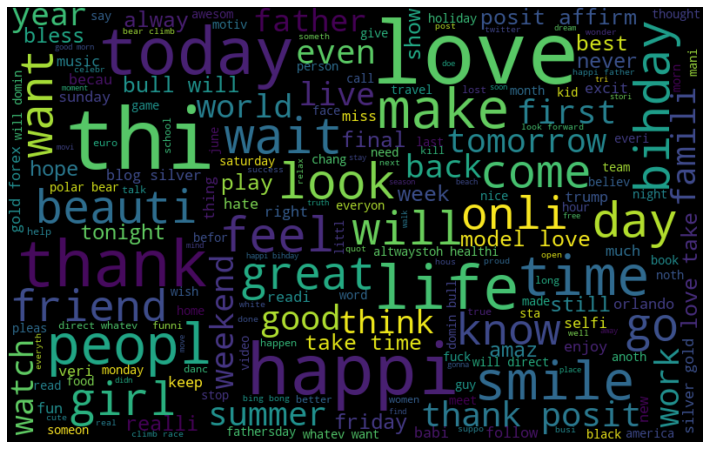

In [56]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)
# plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

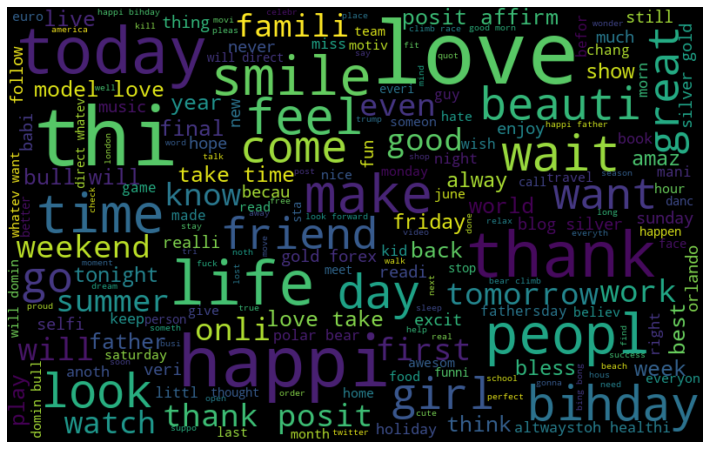

In [57]:
# frequent words visualization for positive words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']== 0]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)
# plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

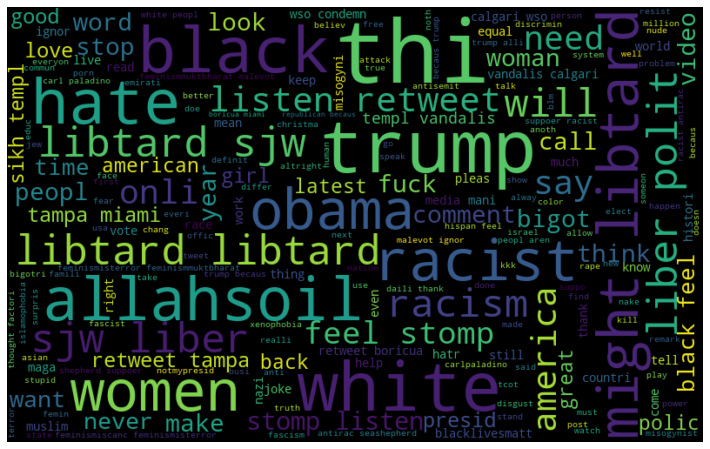

In [58]:
# frequent words visualization for negative words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)
# plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
# extract the hashtags from the tweets
def hashtag_extract(tweets):
  hashtags = []
  # Loops through all the words in the tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags

In [60]:
# extract hashtags from non-racist/sexist tweets or positve tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])

# extract hashtags from racist/sexist tweets or negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])

In [61]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [62]:
# unnest the list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative,[])

In [63]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [64]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


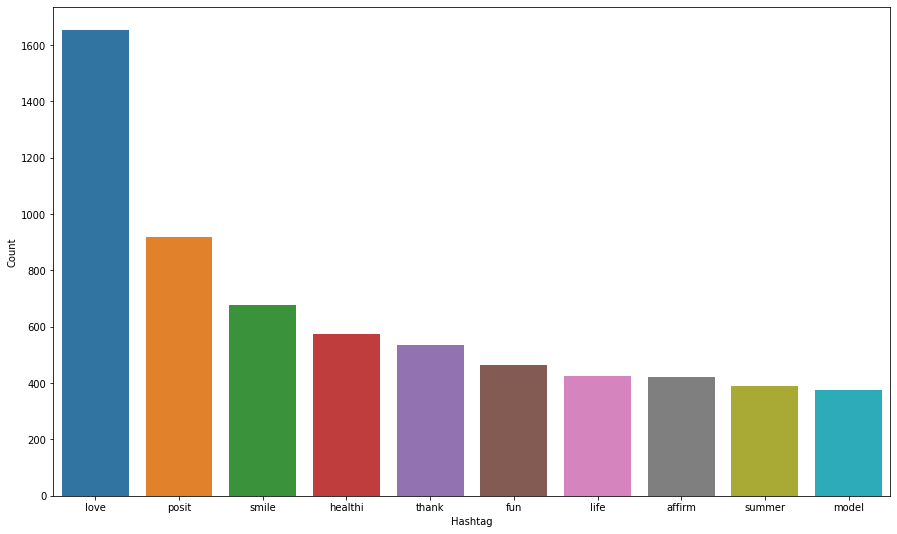

In [65]:
# selects the top 10 positive hashtags
d = d.nlargest(columns = 'Count', n=10)
plt.figure(figsize = (15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

In [66]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


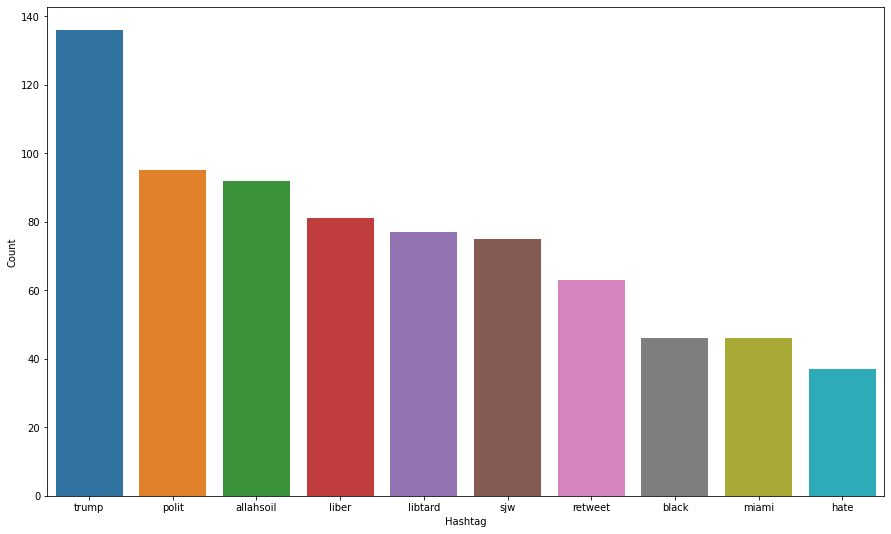

In [67]:
# select top 10 negative hashtags
d = d.nlargest(columns = 'Count', n=10)
plt.figure(figsize = (15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

# Input Split

In [68]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2,max_features = 1000,stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [69]:
# bow[0].toarray()

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,df['label'],random_state = 42, test_size = 0.25)

# Model Training

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [72]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# testing
pred = model.predict(x_test)
f1_score(y_test,pred)


0.49763033175355453

In [74]:
accuracy_score(y_test,pred)

0.9469403078463271

In [75]:
# use probablility to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test,pred)

0.5545722713864307

In [76]:
# accuracy score showed us how many tweets were predicted correctly using this model
accuracy_score(y_test,pred)

0.9433112251282693

In [77]:
pred_prob[0][1] >= 0.3

False